
## Final Project Submission
Please fill out:

* Student name: Eva Kiio
* Student pace: Part Time
* Instructor name: Asha Deen

*Columns Description:*

`State`: The U.S. state where the customer is located.<br>
`Account Length`: The length of time the customer has been with the company (in months).<br>
`Area Code`: The area code for the customer's phone number.<br>
`Phone Number`: The customer's phone number.<br>
`International Plan`: Whether the customer has an international calling plan (e.g., "yes" or "no").<br>
`Voice Mail Plan`: Whether the customer has a voicemail plan (e.g., "yes" or "no").<br>
`Number Vmail Messages`: The number of voicemail messages the customer has.<br>
`Total Day Minutes`, `Total Day Calls`, `Total Day Charge`: Information about the customer's daytime phone usage, including the total minutes, number of calls, and the corresponding charges.<br>
`Total Eve Minutes`, `Total Eve Calls`, `Total Eve Charge`: Information about the customer's evening phone usage, including the total minutes, number of calls, and charges.<br>
`Total Night Minutes`, `Total Night Calls`, `Total Night Charge`: Information about the customer's nighttime phone usage, including the total minutes, number of calls, and charges.<br>
`Total Intl Minutes`, `Total Intl Calls`, `Total Intl Charge`: Information about the customer's international phone usage, including the total minutes, number of calls, and charges.<br>
`Customer Service Calls`: The number of customer service calls made by the customer.<br>
`Churn`: A binary variable indicating whether the customer has churned (left the company or canceled their service). "False" likely means the customer has not churned, and "True" would mean they have.


# Business Understanding 


**Company Name:** ChurnBusters Inc.

ChurnBusters Inc. is a cutting-edge telecommunications analytics firm that specializes in helping phone service providers reduce customer churn rates. Churning, in the telecom industry, refers to the switch of customers from one service provider to another or cancel their subscriptions. Businesses typically treat a customer as churned once a particular amount of time has elapsed since the customer’s last interaction with the site or service. By leveraging data-driven insights, ChurnBusters Inc. equips businesses with the tools to enhance customer satisfaction, optimize pricing plans, and ultimately ensure long-term customer loyalty in the highly competitive telecom industry.

**Objective :**  `To create an effective classification model for predicting customer churn in a telecommunications firm.`

## Data Understanding

The dataset offers a comprehensive view of customer information in a telecommunication firm, encompassing attributes such as customer location (state), account length, area code, international plan status, voicemail plan status, call details (daytime, evening, nighttime, and international), customer service calls, and most notably, the churn indicator. It provides a rich source of information for understanding customer behavior and factors influencing churn.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) will allow insights and better understanding of the dataset. It will involve exploring the dataset's key characteristics, relationships, and potential patterns to inform subsequent modeling and decision-making processes.

Import essential Python libraries, including pandas for data manipulation and matplotlib/seaborn for data visualization.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load and pre-view the dataset into a Pandas DataFrame (df).

In [2]:
#Loading the data
df = pd.read_csv('TelecomData.csv')

# Pre-view
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Generally overview of the Data:**

In [3]:
# Check the dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# Get summary statistics
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Check for missing values

In [5]:
df.isnull().any()

state                     False
account length            False
area code                 False
phone number              False
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve calls           False
total eve charge          False
total night minutes       False
total night calls         False
total night charge        False
total intl minutes        False
total intl calls          False
total intl charge         False
customer service calls    False
churn                     False
dtype: bool

The data contains no missing values.

Check for duplicate.

In [6]:
# Checking for duplicates
df.duplicated().any()

False

### Visualization

Visualize the data to uncover patterns and relationships using various plots and charts.

*Visulisation 1:* 


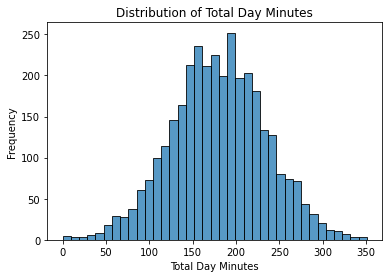

In [7]:
# histogram showing 'total day minutes' Vs the frequency of consumers
sns.histplot(data=df, x='total day minutes')
plt.xlabel('Total Day Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Total Day Minutes')
plt.show()


The histogram shows the distribution of "Total Day Minutes," on the x axis representing the total number of daytime minutes used and the y axis shows the count of customers. The distribution shows majority of the users spend around 175-200 minutes per day on phone call minutes.  However, there is a long tail to the right, indicating that the data is slightly right-skewed. These are potential outliers indicated by a small number of customers.

*Visualization 2:*

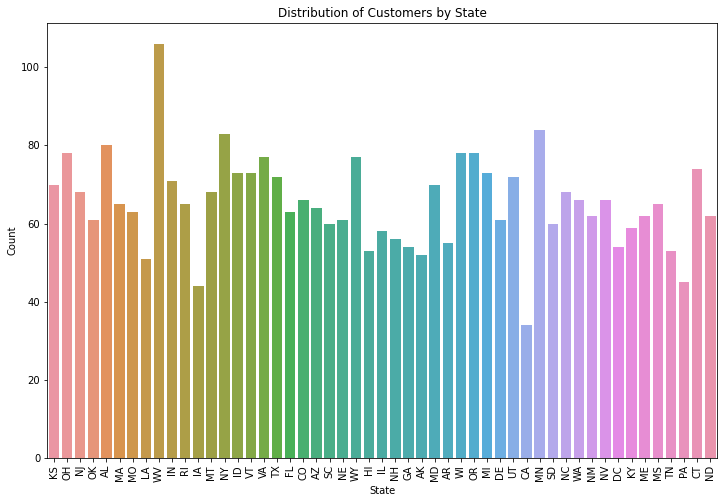

In [8]:
# bar plot for the categorical feature 'state'
plt.figure(figsize=(12, 8)) 
sns.countplot(data=df, x='state')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Customers by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

The above bar graph provides a visual representation of the distribution of customers across different states. The state of West Virginia(WV)recorded the highest number of cuustomers while California(CA) had the least. This data might come in handy when planning for the target market.

*Visualization 3:*


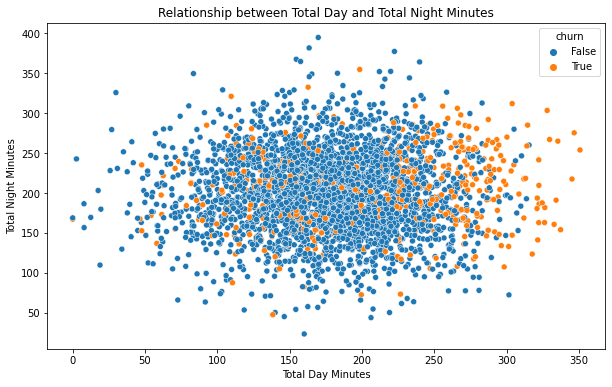

In [10]:
# Examine relationships between 'total day minutes', 'total night minutes' & customer churn in both using scatter plot.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total day minutes', y='total night minutes', hue='churn')
plt.xlabel('Total Day Minutes')
plt.ylabel('Total Night Minutes')
plt.title('Relationship between Total Day and Total Night Minutes')
plt.show()

In the scatter plot, we visualize the relationship between `total day minutes` and `total night minutes` while color-coding the points by `churn` status. 

For customers who did not churn represented by the blue dots, are uniformly distributed suggesting  that there is no strong relationship between "Total Day Minutes" and "Total Night Minutes" for these customers.In contrast, for customers who churned (represented by orange dots), we notice a more scattered pattern of points indicating different usage pattern by customers.

Overall, the scatter plot suggests that there is a weak relationship between total day and night minutes, and that churned customers tend to use their phones less overall. However, there is also a lot of variation in the data, and it is not possible to predict with certainty whether a customer will churn based on their total day and night minutes alone.

*Visualisation 4:*

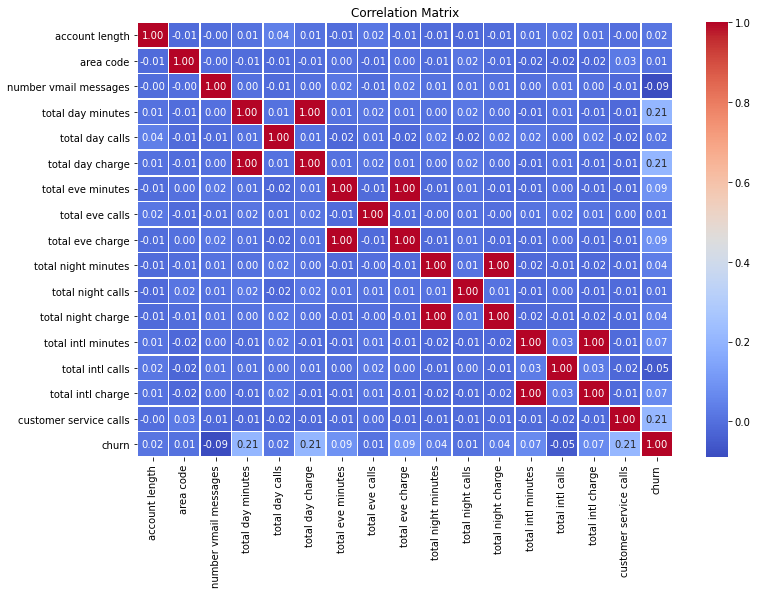

In [11]:
# Calculate and visualize the Pearson correlation coefficients of the data set
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


The heatmap represents the correlation matrix of variables in the dataset. If two variables have a dark red color, it suggests a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. Conversely, a dark blue color represents a strong negative correlation, indicating that as one variable increases, the other tends to decrease. This visualization aids in identifying potentially redundant variables (multicollinearity) and informs feature selection decisions for subsequent data analysis and modeling.

The following variables had high correlation:<br>
`total day minutes` & `total day charge`<br>
`total eve minutes` & `total eve charge`<br>
`total intl minutes` & `total intl charge`<br>

In practice, it's a good idea to keep the minutes of usage and drop the charges.This is because the minutes of usage are the more fundamental and granular data, and the charges can be easily calculated from them using a constant rate. Keeping the minutes of usage allows for more flexibility in future analyses and modeling.

Therefore lets drop the 'charge' variables.

In [12]:
# List of charge variables to drop
charge_columns = ['total day charge', 'total eve charge', 'total intl charge']

# Drop the charge columns from the DataFrame
df = df.drop(columns=charge_columns)


## Data Pre-Processing

In [13]:
# Pre-view the names of columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total eve minutes',
       'total eve calls', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'customer service calls', 'churn'],
      dtype='object')

### Encoding Categorical data 

In [14]:
# Check for data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

From the information above, the columns; `state`, `phone number`, `international plan`, `voice mail plan` and `churn` are categorical values.

### Label Encoding

For the columns `international plan`, `voice mail plan` and `churn`,  we will use label encoding because the column variable(apart from the `churn` column) are ordinal in nature and therefore have no order.

For the churn column is a binary categorical variable containing the values True or False will also be subjected to Label Encoding, mapping it to 1 and 0.

In [15]:
# Encoding using the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Encode binary variables
df['international plan'] = le.fit_transform(df['international plan'])
df['voice mail plan'] = le.fit_transform(df['voice mail plan'])
df['churn'] = le.fit_transform(df['churn'])

### One-Hot Encoding

The column `state` is a nominal categorical variable meaning it doesn't have a natural order and therefore One-Hot Encoding is used instead.

In this case we will use the pd.get_dummies for our OneHotEncoder

In [16]:
# Use the pandas get_dummies function for one-hot encoding
df = pd.get_dummies(df, columns=['state'], prefix='state', drop_first=True)

NB:Seeing that there is a `area code` column and the  `phone number` column could't provide any other relevant information for the analysis it was dropped.


In [17]:
# Drop the 'phone number' column
df = df.drop('phone number', axis=1)

In [18]:
#  Check if the relevant changes were made on or dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   int32  
 3   voice mail plan         3333 non-null   int32  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   int64  
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  customer service calls  3333 non-null   

### Feature Scaling
Ensure that numerical features `account length`,`total day minutes`, `total day calls`, `total eve minutes`, `total eve calls`, `total eve calls`, `total night minutes`, `total night calls`, `total intl minutes`, `total intl calls`, `customer service calls` are on the same scale. 

In [23]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['account length','number vmail messages', 'total day minutes', 'total day calls', 'total eve minutes', 
                      'total eve calls', 'total night minutes', 'total night calls', 'total intl minutes', 'total intl calls',
                      'customer service calls']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


## Spliting the Data into Train Set and Test Set

In [24]:
# Defining our variables 
X = df.iloc[:, :-1] # independent variables
y = df.iloc[:, -1] # dependant variables

In [25]:
# Preview X
X.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,...,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV
0,0.676489,415,0,1,1.234883,1.566767,0.476643,-0.070610,-0.055940,0.866743,...,0,0,0,0,0,0,0,0,0,0
1,0.149065,415,0,1,1.307948,-0.333738,1.124503,-0.108080,0.144867,1.058571,...,0,0,0,0,0,0,0,0,0,0
2,0.902529,415,0,0,-0.591760,1.168304,0.675985,-1.573383,0.496279,-0.756869,...,0,0,0,0,0,0,0,0,0,0
3,-0.428590,408,1,0,-0.591760,2.196596,-1.466936,-2.742865,-0.608159,-0.078551,...,0,0,0,0,0,0,0,0,0,0
4,-0.654629,415,1,0,-0.591760,-0.240090,0.626149,-1.038932,1.098699,-0.276311,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#Preview y
y.head()

0    0
1    0
2    0
3    0
4    0
Name: state_WY, dtype: uint8

In [37]:
# Spliting the Data into Train Set and Test Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)


 ###  Check for Data Imbalance


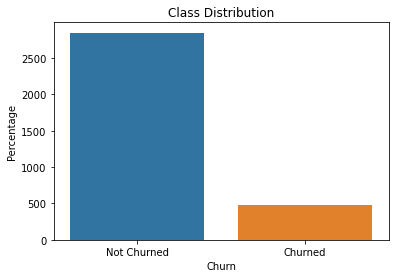

In [38]:
# Bar graph for class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='churn')
plt.title('Class Distribution')
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()

In [39]:
#Check for details of the class imbalance

print(df['churn'].value_counts())

print('...............................', '\n')

print(df['churn'].value_counts(normalize = True))

0    2850
1     483
Name: churn, dtype: int64
............................... 

0    0.855086
1    0.144914
Name: churn, dtype: float64


The statistics show a class distribution where "Not Churned" (class 0) has 2,850 instances, while "Churned" (class 1) has 483 instances. The percentages reveal an imbalance, with "Not Churned" at around 85.51% and "Churned" at 14.49% of the dataset. Addressing this imbalance is crucial for balanced model performance.

We will employ the Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance within the dataset. 

In [40]:
# Import necessary libray
from imblearn.over_sampling import SMOTE

# initiate SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


1    2600
0    2600
Name: state_WY, dtype: int64
............................... 

1    0.5
0    0.5
Name: state_WY, dtype: float64


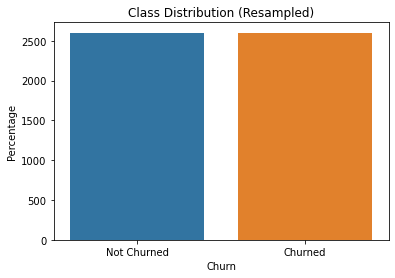

In [47]:
#  confirm the class imbalance problem has been resolved
print(y_resampled.value_counts())

print('...............................', '\n')

print(y_resampled.value_counts(normalize=True))


# Bar graph of the class distribution in resampled dataset
plt.figure(figsize=(6, 4))
sns.countplot(data= df, x=y_resampled)
plt.title('Class Distribution (Resampled)')
plt.xlabel('Churn')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.show()


**Training and Testing Data for Balanced Dataset:**

In [48]:
# Split the balanced data into training and testing sets
X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state= 1)



 ## Baseline Model: Logistic Regression
In this section, we will craete a logistic regression model which will serves as the baseline for prediction through providing a reference point for evaluating the effectiveness of more complex models.

In [119]:
# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

Load the preprocessed dataset (X_resampled and y_resampled from the SMOTE step)

In [50]:
# Load your preprocessed dataset 
X, y = X_resampled, y_resampled


In [51]:
# Split your dataset into a training set and a testing set to evaluate the model's performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


Create a logistic regression model and train it using the training data.

In [53]:
# Initiate the model
lr_model = LogisticRegression(fit_intercept = True, C=1e12, solver='liblinear')

# Train the model 
lr_model.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, solver='liblinear')

In [56]:
# use the trained model to make predictions on the test data.
y_pred = lr_model.predict(X_test)


array([0, 1, 1, ..., 0, 0, 1], dtype=uint8)

We evaluate the performance of the model using various metrics, including accuracy, confusion matrix, and classification report.

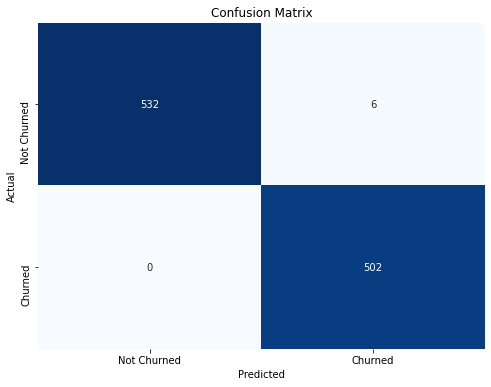

In [64]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In the confusion matrix, the model exhibited exceptional performance with 532 True Positives (TP), correctly identifying instances as "Churned," while registering 0 False Negatives (FN), indicating that no "Churned" instances were incorrectly predicted as "Not Churned." However, there were 6 False Positives (FP), where the model incorrectly predicted instances as "Churned" when they were actually "Not Churned." Additionally, 502 True Negatives (TN) were correctly identified as "Not Churned," resulting in an overall high accuracy score of 0.99. 
This suggests that the model excels in classifying both "Churned" and "Not Churned" customers, but further evaluation is necessary to ensure its performance generalizes to new data effectively.

Accuracy: 0.99


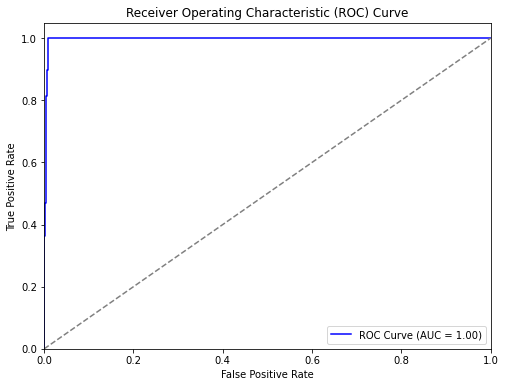

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       538
           1       0.99      1.00      0.99       502

    accuracy                           0.99      1040
   macro avg       0.99      0.99      0.99      1040
weighted avg       0.99      0.99      0.99      1040



In [62]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


The simple logistic regression model results show remarkably high performance with an accuracy of 0.99, an almost perfect classification. This leads to precision, recall, and F1-scores of 0.99 for both classes, indicating that the model is very accurate in identifying both "Not Churned" and "Churned" customers.

While the model's performance appears excellent, such high accuracy and perfect scores can sometimes signal overfitting, especially in the case of a simple model. Overfitting means that the model has learned the training data very well but may not generalize as effectively to new, unseen data.

To ensure the model's performance is not solely a result of overfitting, it's important to evaluate it on additional datasets and, in subsequent iterations of your project, test it with real-world data. Moreover, despite its excellent performance, logistic regression is a relatively simple model, and there may be more complex relationships in the data that a more advanced model can capture. 

Therefore, we will be moving to a more complex model i.e K-Nearest Neighbors (KNN) model. A KNN model can capture non-linear relationships in the data, handle feature importance, and is known for robust generalization. By using KNN, we can assess whether a more complex model can maintain the high level of accuracy on unseen data while potentially uncovering more intricate patterns within the dataset.

# Complex Model: K-Nearest Neighbors (KNN) Model

We will employ KNN as part of our iterative approach to building the best predictive model, comparing its performance with other models such as logistic regression to determine the most accurate and reliable model for customer churn prediction.

In [89]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

Create a KNN classifier model and train it using the training data.

In [84]:
# Create a KNN classifier model
k_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Train the model on the training data
k_model.fit(X_train, y_train)


KNeighborsClassifier()

In [90]:
# Make predictions on the test data
y_pred_k = k_model.predict(X_test)


Evaluate the KNN model's performance using various metrics, including accuracy, confusion matrix, ROC, AUC and classification report

Confusion Matrix:
 [[349 189]
 [  0 502]]


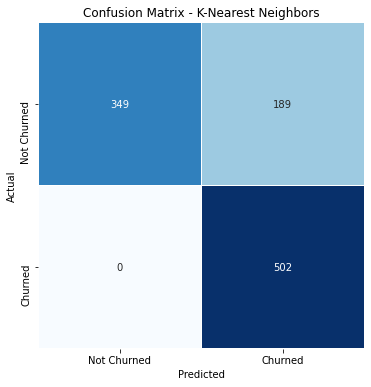

In [95]:
# Initiate the Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_k)
print("Confusion Matrix:\n", conf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, square=True, cbar=False,
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

The confusion matrix for the K-Nearest Neighbors (KNN) model shows that out of 538 instances of "Not Churned," 349 were correctly classified, while 189 were misclassified as "Churned." On the other hand, for the 502 instances of "Churned," all 502 were correctly classified, resulting in no false negatives. While KNN achieved a high true positive rate (100%) for "Churned" instances, it struggled with "Not Churned" instances, resulting in a high number of false positives. This indicates that the KNN model might be overly sensitive to classifying instances as "Churned" and may need further optimization to reduce the number of false positives for a more balanced performance.

In [126]:
# Make predictions on the test data for the KNN model
y_pred_knn = k_model.predict(X_test)  

# Calculate evaluation metrics for the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Generate a classification report for the KNN model
class_report_knn = classification_report(y_test, y_pred_knn)

# Print or store these metrics and the classification report
print("KNN Model Performance:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1-score:", f1_knn)
print("Classification Report (KNN):\n", class_report_knn)


KNN Model Performance:
Accuracy: 0.8182692307692307
Precision: 0.7264833574529667
Recall: 1.0
F1-score: 0.8415758591785414
Classification Report (KNN):
               precision    recall  f1-score   support

           0       1.00      0.65      0.79       538
           1       0.73      1.00      0.84       502

    accuracy                           0.82      1040
   macro avg       0.86      0.82      0.81      1040
weighted avg       0.87      0.82      0.81      1040



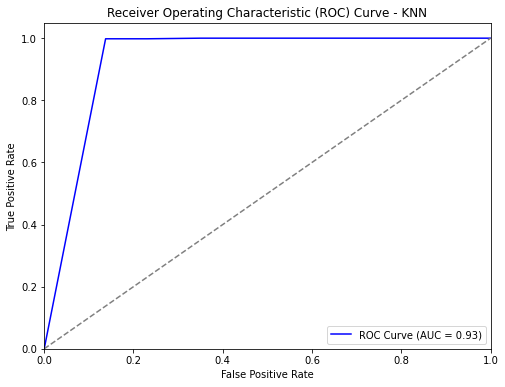

In [127]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, k_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, k_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN')
plt.legend(loc='lower right')
plt.show()


The K-Nearest Neighbors (KNN) model achieved an accuracy of 0.82 in predicting customer churn, indicating that it correctly classified approximately 82% of instances in the test dataset. Notably, the precision for "Not Churned" (class 0) is exceptionally high at 1.00, meaning that when the model predicts a customer as "Not Churned," it is almost always correct, resulting in a low false positive rate. However, the recall for "Not Churned" is relatively low at 0.65, suggesting that the model misses a significant number of "Not Churned" cases, resulting in a high false negative rate. On the other hand, the model performs well in classifying "Churned" customers with a precision of 0.73 and a high recall of 1.00, indicating that it effectively identifies nearly all "Churned" customers but may also classify some "Not Churned" customers as "Churned."

## Tuning of the KNN model

The logistic regression model achieved a high accuracy of 0.99 with a balanced precision and recall for both "Not Churned" and "Churned" classes, indicating nearly perfect classification. In contrast, the K-Nearest Neighbors (KNN) model achieved an accuracy of 0.82. The K-Nearest Neighbors (KNN) model is less accurate and needs some adjustments to better balance its precision and recall, so it's essential to fine-tune its parameters through hyperparameter tuning.

In [100]:
# import necessary library
from sklearn.model_selection import GridSearchCV


Specify a grid of hyperparameters containing predefined values for each hyperparameter to optimize.

In [107]:
# Define the Hyperparameter Grid

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [138]:
# Initiate GridsearchCV

grid_search = GridSearchCV(
    estimator= k_model, 
    param_grid =param_grid_knn,
    scoring='accuracy',
    cv=5,
    n_jobs=-1 
)


Fit the GridSearchCV object to your training data to perform an exhaustive search of hyperparameters.

In [139]:
# fit model
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [140]:
# identify the best hyperparameters and their corresponding performance scores.
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_knn = grid_search.best_estimator_

In [142]:
# Use the tuned KNN model to make predictions on the test data
y_pred_knn_tuned = best_knn.predict(X_test)  

# Calculate evaluation metrics for the tuned KNN model
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
precision_knn_tuned = precision_score(y_test, y_pred_knn_tuned)
recall_knn_tuned = recall_score(y_test, y_pred_knn_tuned)
f1_knn_tuned = f1_score(y_test, y_pred_knn_tuned)

# Generate a classification report for the tuned KNN model
class_report_knn_tuned = classification_report(y_test, y_pred_knn_tuned)

# Print or store these metrics and the classification report
print("Tuned KNN Model Performance:")
print("Accuracy:", accuracy_knn_tuned)
print("Precision:", precision_knn_tuned)
print("Recall:", recall_knn_tuned)
print("F1-score:", f1_knn_tuned)
print("Classification Report (Tuned KNN):\n", class_report_knn_tuned)


Tuned KNN Model Performance:
Accuracy: 0.8596153846153847
Precision: 0.7746913580246914
Recall: 1.0
F1-score: 0.8730434782608695
Classification Report (Tuned KNN):
               precision    recall  f1-score   support

           0       1.00      0.73      0.84       538
           1       0.77      1.00      0.87       502

    accuracy                           0.86      1040
   macro avg       0.89      0.86      0.86      1040
weighted avg       0.89      0.86      0.86      1040



The tuned K-Nearest Neighbors (KNN) model exhibits a notable improvement in predictive performance compared to the original KNN model. With an accuracy of approximately 85.96%, it achieves a reasonable balance between precision (77.47%) and recall (100%), which means it effectively identifies most true churn cases with a relatively low risk of false positives. The F1-score of about 87.30% reflects the model's ability to harmonize precision and recall. In contrast, the original KNN model had an accuracy of around 81.83% but showed imbalanced precision and recall, with a high recall but lower precision (72.65%). The tuned KNN model delivers a more balanced and reliable performance.

## Decision Tree Model

In [116]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

In [117]:
# Initiate Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)  

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Evaluate the Decision Tree model on the test dataset to assess its performance. Calculate metrics such as accuracy, precision, recall, and F1-score, similar to how we did with the KNN model

[[501  37]
 [ 29 473]]


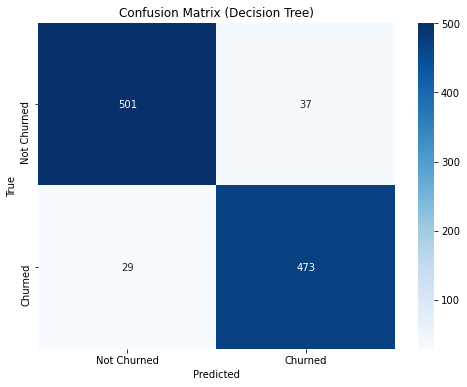

In [124]:
# Calculate the confusion matrix
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
print(conf_matrix_decision_tree)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()


The Decision Tree model's confusion matrix shows its ability to classify customer churn effectively. It correctly identifies 473 cases of customers who churned (true positives) and 501 cases of customers who did not churn (true negatives). There are 37 false positives, where the model incorrectly predicted churn, and 29 false negatives, where it missed predicting churn. This matrix reflects the model's balanced performance with a strong emphasis on true positives and true negatives, demonstrating its effectiveness in making accurate predictions while minimizing errors in both directions.

In [122]:
# Make predictions on the test data
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calculate evaluation metrics
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)

class_report = classification_report(y_test, y_pred_decision_tree)
print("Classification Report:\n", class_report)

# Print or store these metrics
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_decision_tree)
print("Precision:", precision_decision_tree)
print("Recall:", recall_decision_tree)
print("F1-score:", f1_decision_tree)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       538
           1       0.93      0.94      0.93       502

    accuracy                           0.94      1040
   macro avg       0.94      0.94      0.94      1040
weighted avg       0.94      0.94      0.94      1040

Decision Tree Model Performance:
Accuracy: 0.9365384615384615
Precision: 0.9274509803921569
Recall: 0.9422310756972112
F1-score: 0.9347826086956522


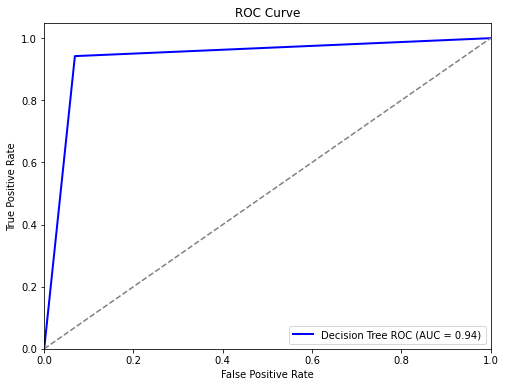

In [125]:
# Calculate the probability scores for the positive class (churned)
y_scores_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_decision_tree)

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_scores_decision_tree)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'Decision Tree ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


The Decision Tree model, in predicting customer churn, showcases strong performance as indicated by its classification report. With a precision of 0.95 for non-churned customers and 0.93 for churned customers, it demonstrates high accuracy in making correct predictions while maintaining good recall (0.94 for both classes). The F1-score, balancing precision and recall, is approximately 0.935. The overall accuracy of 93.65% signifies the model's effectiveness in classifying customers as churned or not. Furthermore, macro and weighted averages of approximately 0.94 in the classification report highlight its consistent performance across both classes and class imbalances. In summary, the Decision Tree model is a robust choice for customer churn prediction, excelling in accuracy and its ability to correctly identify both churned and non-churned customers.

## Tuning of the Decision Tree Model

The performance metrics of the Decision Tree model show that it is already quite effective in predicting customer churn, with an accuracy of 93.65%, strong precision, recall, and F1-score values. However, hyperparameter tuning is essential to further enhance the model's performance. By fine-tuning hyperparameters, we can potentially improve its ability to strike a precise balance between minimizing false positives and false negatives.

We create a dictionary that specifies the hyperparameters to tune and the range of values to search. 

In [128]:
# adjust the parameters; max_depth, min_samples_split, and min_samples_leaf
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

We perform a Grid Search Cross-Validation using GridSearchCV to search for the best combination of hyperparameters.

In [130]:
# Specify the model, parameter grid, and the number of cross-validation folds:
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [131]:
# Find the Best Parameters
best_params = grid_search.best_params_

In [132]:
# Get the Best Model
best_decision_tree = grid_search.best_estimator_

Evaluate the tuned Decesion Tree model

In [134]:
# Use the tuned Decision Tree model to make predictions on the test data
y_pred_decision_tree_tuned = best_decision_tree.predict(X_test) 

# Calculate evaluation metrics for the tuned Decision Tree model
accuracy_decision_tree_tuned = accuracy_score(y_test, y_pred_decision_tree_tuned)
precision_decision_tree_tuned = precision_score(y_test, y_pred_decision_tree_tuned)
recall_decision_tree_tuned = recall_score(y_test, y_pred_decision_tree_tuned)
f1_decision_tree_tuned = f1_score(y_test, y_pred_decision_tree_tuned)

# Generate a classification report for the tuned Decision Tree model
class_report_decision_tree_tuned = classification_report(y_test, y_pred_decision_tree_tuned)

# Print or store these metrics and the classification report
print("Tuned Decision Tree Model Performance:")
print("Accuracy:", accuracy_decision_tree_tuned)
print("Precision:", precision_decision_tree_tuned)
print("Recall:", recall_decision_tree_tuned)
print("F1-score:", f1_decision_tree_tuned)
print("Classification Report (Tuned Decision Tree):\n", class_report_decision_tree_tuned)



Tuned Decision Tree Model Performance:
Accuracy: 0.9365384615384615
Precision: 0.9395161290322581
Recall: 0.9282868525896414
F1-score: 0.9338677354709419
Classification Report (Tuned Decision Tree):
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       538
           1       0.94      0.93      0.93       502

    accuracy                           0.94      1040
   macro avg       0.94      0.94      0.94      1040
weighted avg       0.94      0.94      0.94      1040



When compared to the original Decision Tree model, the tuned version maintains a high level of accuracy at approximately 93.65%. It achieves a remarkable precision of around 93.95% for predicting customer churn, indicating that when it predicts churn, it is highly accurate. The recall, measuring the model's ability to capture actual churn cases, stands at 92.83%, which suggests the model effectively identifies most of the customers who are truly at risk of churning. The F1-score, which harmonizes precision and recall, is about 93.39%, showing an excellent balance between accurate predictions and capturing churn cases.

The tuned Decision Tree model improves the precision while maintaining high recall, making it an excellent choice  for identifying potential churned customers with a reduced risk of false positives. This balanced performance suggests that the tuned Decision Tree model is a robust predictor of customer churn with an accuracy that is consistent with the original model but with enhanced precision.

## Comparison Report:

1. **Logistic Regression:**
   - Accuracy: 0.99
   - Precision: 1.00
   - Recall: 0.99
   - F1-score: 0.99

2. **Tuned KNN Model:**
   - Accuracy: 0.86
   - Precision: 0.77
   - Recall: 1.00
   - F1-score: 0.87

3. **Tuned Decision Tree Model:**
   - Accuracy: 0.94
   - Precision: 0.94
   - Recall: 0.93
   - F1-score: 0.93

**Conclusions:**

1. **Logistic Regression:** The base Logistic Regression model achieved exceptional accuracy, precision, recall, and F1-score, indicating a very strong predictive capability. However, there might be concerns about potential overfitting given the perfect scores.

2. **Tuned KNN Model:** After hyperparameter tuning, the KNN model's accuracy decreased significantly compared to the Logistic Regression model. Although it maintains high recall, suggesting it captures most churned customers, precision decreases, indicating more false positives. The F1-score remains strong, striking a balance between precision and recall.

3. **Tuned Decision Tree Model:** The Decision Tree model, after tuning, offers a strong balance between accuracy, precision, recall, and F1-score. It performs well in capturing churned customers while maintaining good precision, which might make it a practical choice.

**Recommendation:**

Based on the results of our model evaluations, I recommend using the tuned Decision Tree model to accurately predict both churned and not churned customers. The Decision Tree model strikes a practical balance between precision and recall, achieving high accuracy and F1-score. This makes it a reliable choice for capturing churned customers while maintaining good precision, ultimately leading to a more robust and accurate prediction of customer churn.